In [1]:
%pylab
%matplotlib inline
import pandas as pd

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


# Plots for the MIST Antenna

Frequency from 40 to 120 MHz

$\alpha=2.5$

6 minute intervals

In [2]:
TG_M=loadtxt('DS+G MIST.txt')           #Dynamic Spectra MIST Antenna
TG_B=loadtxt('DS+G BOWTIE.txt')         #Dynamic Spectra BOWTIE Antenna
TG_E=loadtxt('DS+G EDGES.txt')          #Dynamic Spectra EDGES Antenna

gal_l=loadtxt('gal_l_cenit.txt')        #Galactic Longitude of the cenit file

fig1=pd.read_csv(r"C:\Users\msmm1\Documents\Universidad\Trabajo de Grado\figure1_plotdata.csv",
                 names=['Freq','Weight','Tsky','Tres1','Tres2','Tmodel','T21'],
                 skiprows=4,skipfooter=2,engine='python')        #Spectra data from EDGES

In [3]:
hours=linspace(0,24,240)
f=arange(40,121,1)

In [4]:
colors=['lightseagreen','g']

Text(0, 0.5, 'Galactic Longitude (deg)')

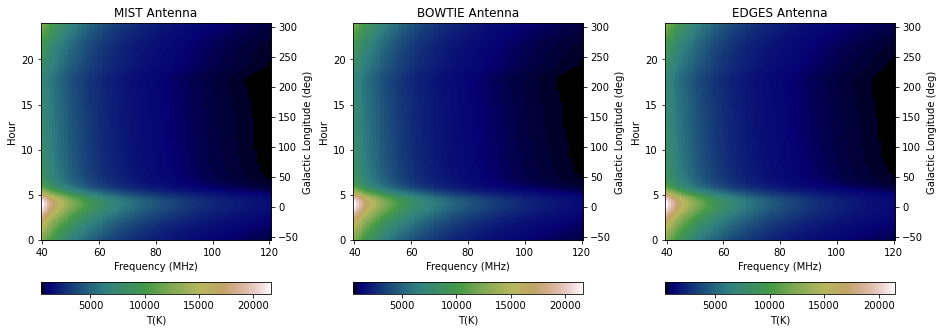

In [9]:
##DYNAMIC SPECTRA
fig, axs = plt.subplot_mosaic('''ABC''', constrained_layout=True)
fig.set_size_inches(13, 4.5)

ax1 = axs['A']
ax2 = ax1.twinx()
a2=ax2.pcolormesh(f,gal_l, TG_M,cmap='gist_earth',shading='auto')
a1=ax1.pcolormesh(f,hours, TG_M,cmap='gist_earth',shading='auto')


fig.colorbar(a1,ax=ax1,label='T(K)',orientation="horizontal")
ax1.title.set_text("MIST Antenna"),ax1.set_xlabel('Frequency (MHz)'),ax1.set_ylabel('Hour')
ax2.set_ylabel('Galactic Longitude (deg)')

ax3 = axs['B']
ax4 = ax3.twinx()
a3=ax3.pcolormesh(f,hours, TG_B,cmap='gist_earth',shading='auto')
a4=ax4.pcolormesh(f,gal_l, TG_B,cmap='gist_earth',shading='auto')
fig.colorbar(a3,ax=ax3,label='T(K)',orientation="horizontal")
ax3.title.set_text("BOWTIE Antenna"),ax3.set_xlabel('Frequency (MHz)'),ax3.set_ylabel('Hour')
ax4.set_ylabel('Galactic Longitude (deg)')

ax5 = axs['C']
ax6 = ax5.twinx()
a5=ax5.pcolormesh(f,hours, TG_E,cmap='gist_earth',shading='auto')
a6=ax6.pcolormesh(f,gal_l, TG_E,cmap='gist_earth',shading='auto')
fig.colorbar(a5,ax=ax5,label='T(K)',orientation="horizontal")
ax5.title.set_text("EDGES Antenna"),ax5.set_xlabel('Frequency (MHz)'),ax5.set_ylabel('Hour')
ax6.set_ylabel('Galactic Longitude (deg)')


In [10]:
#fig.savefig(r'C:\Users\msmm1\Documents\Universidad\Trabajo de Grado\Gráficos\Dynamic Spectra MIST.png') 

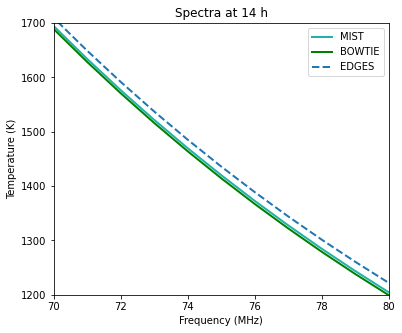

In [14]:
##ZOOM SPECTRA
figure(figsize=(6,5))
title('Spectra at 14 h')
plot(f,TG_M[140],color=colors[0],linewidth=2,label='MIST')
plot(f,TG_B[140],color=colors[1],linewidth=2,label='BOWTIE')
plot(f,TG_E[140],'--',linewidth=2,label='EDGES')
legend(),xlim([70,80]),ylim([1200,1700])
xlabel('Frequency (MHz)'),ylabel('Temperature (K)')
#savefig(r'C:\Users\msmm1\Documents\Universidad\Trabajo de Grado\Gráficos\Zoom Spectra at 14h.png') 

In [15]:
#RESIDUALS
Res_M=TG_M[140]-TG_E[140]
Res_B=TG_B[140]-TG_E[140]

(Text(0.5, 0, 'Frequency (MHz)'),
 Text(0, 0.5, 'Res T (K)'),
 <matplotlib.legend.Legend at 0x2ce05be7400>)

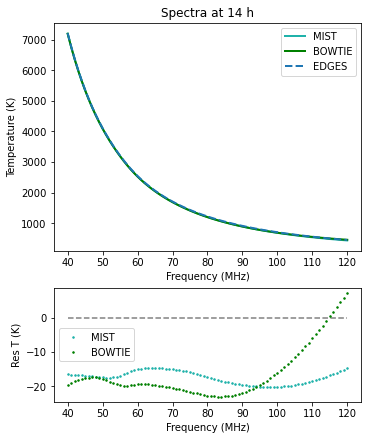

In [18]:
f_res, ax_res = plt.subplot_mosaic('''A
                                      A
                                      B''', constrained_layout=True)
f_res.set_size_inches(5, 6)

ax_spec = ax_res['A']
ax_spec.title.set_text('Spectra at 14 h')
ax_spec.plot(f,TG_M[140],color=colors[0],linewidth=2,label='MIST')
ax_spec.plot(f,TG_B[140],color=colors[1],linewidth=2,label='BOWTIE')
ax_spec.plot(f,TG_E[140],'--',linewidth=2,label='EDGES')
ax_spec.set_xlabel('Frequency (MHz)'),ax_spec.set_ylabel('Temperature (K)'),ax_spec.legend()

ax_resd = ax_res['B']
ax_resd.plot([40,120],[0,0],'k--',alpha=0.5)
ax_resd.plot(f,Res_M,'.',ms=3,color=colors[0],label='MIST')
ax_resd.plot(f,Res_B,'.',ms=3,linewidth=2,color=colors[1],label='BOWTIE')
ax_resd.set_xlabel('Frequency (MHz)'),ax_resd.set_ylabel('Res T (K)'),ax_resd.legend()

In [19]:
#f_res.savefig(r'C:\Users\msmm1\Documents\Universidad\Trabajo de Grado\Gráficos\Residuals from EDGES MIST 14h.png') 

In [20]:
#First Derivative
dM=gradient(TG_M[140],f)
dB=gradient(TG_B[140],f)
dE=gradient(TG_E[140],f)

((80.0, 120.0), (-40.0, -5.0))

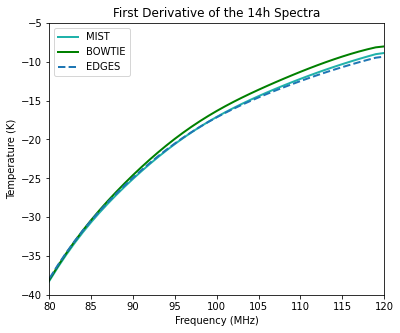

In [40]:
figure(figsize=(6,5))
title('First Derivative of the 14h Spectra')
plot(f,dM,color=colors[0],linewidth=2,label='MIST')
plot(f,dB,color=colors[1],linewidth=2,label='BOWTIE')
plot(f,dE,'--',linewidth=2,label='EDGES')
legend(),xlabel('Frequency (MHz)'),ylabel('Temperature (K)')
xlim([80,120]),ylim([-40,-5])
#savefig(r'C:\Users\msmm1\Documents\Universidad\Trabajo de Grado\Gráficos\Zoom First Derivative of the 14h Spectra MIST.png') 